In [2]:
%cd /content/drive/MyDrive/Colab/0_layout_analysis

import os
import numpy as np
from sklearn.cluster import KMeans, MeanShift, SpectralClustering, estimate_bandwidth
from glob import glob
import json
import matplotlib.pyplot as plt
import matplotlib
import cv2
from google.colab.patches import cv2_imshow

def init_seed(features, len_features, ratio):
    seeds = []
    idx = np.random.choice(len_features, round(len_features * ratio), replace=False).tolist()
    for i in idx:
        seeds.append(features[i])
    return seeds

/content/drive/MyDrive/Colab/0_layout_analysis


In [3]:
# Current directory == 0_layout_analysis

fnames = glob("*.json")

raw_data = []
for fname in fnames:
    f = open(fname)
    data = json.load(f)
    raw_data.append(data)

doc = raw_data[0]
doc_len = len(doc)
coordinates = []
for sent in doc:
    coordinates.append(sent['boundingBox'])

feature_vecs = []
for coordinate in coordinates:
    feature_vec = [(coordinate[0] + coordinate[6])/2,
                   (coordinate[1] + coordinate[7])/2,
                   (coordinate[2] + coordinate[4])/2,
                   (coordinate[3] + coordinate[5])/2]
    feature_vecs.append(feature_vec)

feature_vecs2 = []
for coordinate in coordinates:
    vec = [(coordinate[0] + coordinate[6])/2, (coordinate[1] + coordinate[7])/2]
    feature_vecs2.append(vec)

# Rule - based

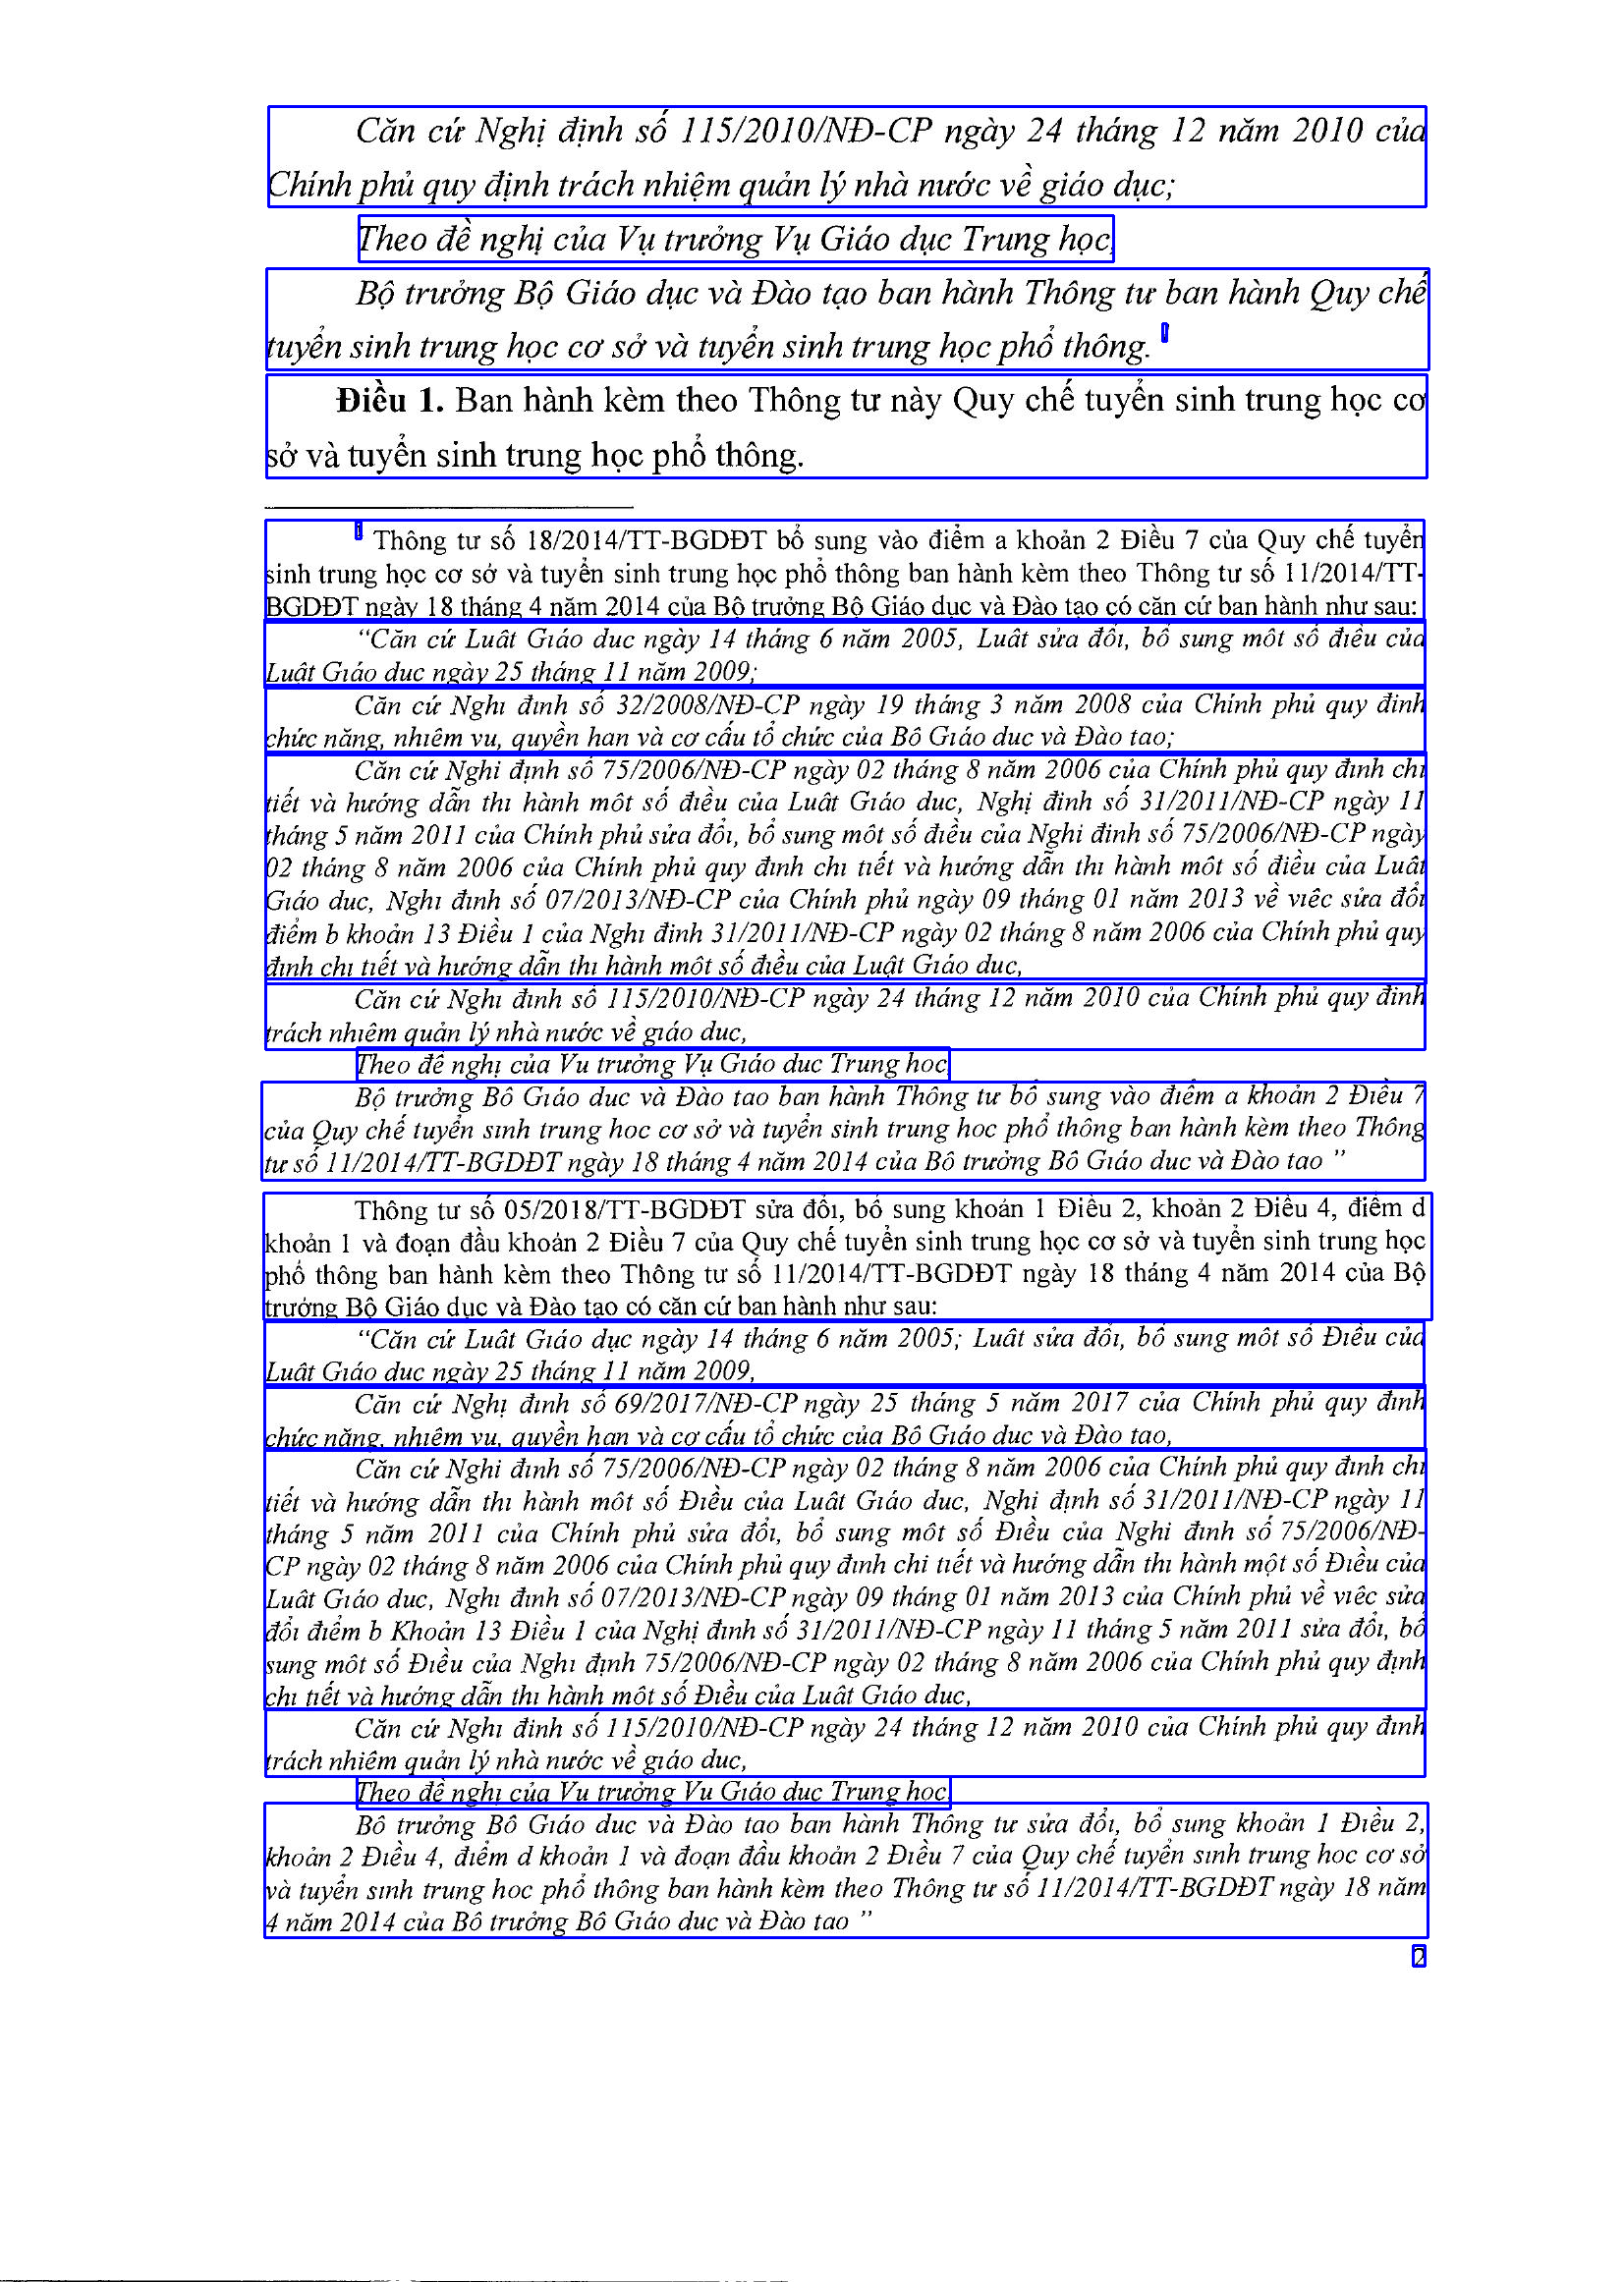

In [4]:
left_indents = []
for vec in feature_vecs2:
    left_indents.append(vec[0])

left_margin = min(left_indents)
threshold = 10
para_marks = []

for vec in feature_vecs2:
    para_marks.append((vec[0] > left_margin + threshold))

para_list = []
para_pos = []
for i in range(doc_len):
    if para_marks[i]:
        p = [i]
        while (i <= doc_len - 2) and (not para_marks[i + 1]):
            p.append(i + 1)
            i += 1
        x1 = min([coordinates[idx][0] for idx in p])
        y1 = min([coordinates[idx][1] for idx in p])
        x2 = max([coordinates[idx][4] for idx in p])
        y2 = max([coordinates[idx][5] for idx in p])
        para_list.append(p)
        para_pos.append((x1, y1, x2, y2))

img = cv2.imread('images/03_VBHN_BGDDT.pdf1.jpg')
for position in para_pos:
    x1, y1, x2, y2 = position
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
cv2_imshow(img)
